In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [5]:
#データの作成
torch.manual_seed(123)
a = 3#傾き
b = 2#切片
x = torch.linspace(0 , 5, 100).view(100,1)#0~5までを100個生成して傾きview(バッチの次元、入力データの次元)
#今回はバッチの次元は100次元入力データは1次元

In [8]:
eps = torch.randn(100 , 1)#100個乱数を生成
y = a * x + b + eps

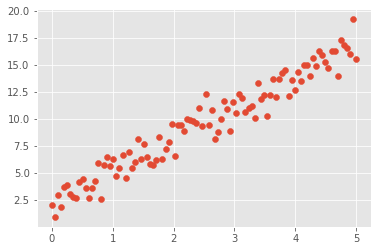

In [10]:
plt.scatter(x,y)

In [11]:
class LR(nn.Module):#nn.Moduleを継承してモデルを作成していく
    def __init__(self):
        super().__init__()#これで親のクラスの変数を初期化している。
        self.linear = nn.Linear(in_features= 1,out_features=1)#in_featuresは受け取る値の数。out_featureは出力する値の数
    
    #順伝番を定義
    def forward(self , x):
        output = self.linear(x)
        return output



In [12]:
#インスタンス化
model  = LR()

In [13]:
x_test = torch.tensor([[1.0] , [2.0]])

In [14]:
#順伝番している様子が分かる
#返り値は予測値を出している。
#modelに１を入れたときは1.1838が返ってきている。
model(x_test)

tensor([[1.1838],
        [2.0380]], grad_fn=<AddmmBackward>)

In [15]:
x2 = torch.linspace(0 , 3, 100).view(100,1)#view(バッチの次元、入力データの次元)

In [17]:
x2.size()

torch.Size([100, 1])

In [19]:
y_pred = model(x2)

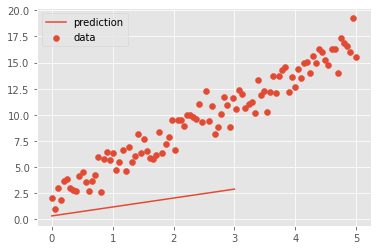

In [21]:
#グラフ化を行うときは勾配計算を取り外しておく必要がある。
#勾配計算を取り外すにはdetachを使用する。
plt.plot(x2 , y_pred.detach(), label='prediction')
plt.scatter(x,y,label="data")
plt.legend()

In [22]:
#損失関数を定義する
criterion  = nn.MSELoss()
#オプティマイザ（勾配降下法）を定義する
optimizer = optim.SGD(model.parameters() , lr = 0.01)
#model.parametersには重み・バイアスの情報が入っている。


In [23]:
#今回は入力をx正解値をyとして計算を行っている。！！

#損失関数を保存しておくリストを作成
losses = []
#エポック数
num_epoch = 500

for epoch in range(num_epoch):
    #今回はミニバッチではなくバッチ学習を行う。
    optimizer.zero_grad()#勾配の初期化を行う。
    y_pred = model(x)#予測値を計算する。

    loss = criterion(y_pred , y)#損失を計算する（予測値　、正解値）
    loss.backward()#誤差逆伝播を行っている。
    optimizer.step()#重みとバイアスの更新を行う。

    #epoch10回ごとに損失の数を表示していく。
    if epoch % 10 == 0:
        print("epoch:{},loss:{}".format(epoch , loss.item()))#item()はtensorからなかの値を取り出している。(参考までに:https://qiita.com/mathlive/items/241bfb42d852bb801b96)
        losses.append(loss.item())

epoch:0,loss:61.14118957519531
epoch:10,loss:2.483957052230835
epoch:20,loss:1.420678734779358
epoch:30,loss:1.3747111558914185
epoch:40,loss:1.3490893840789795
epoch:50,loss:1.3260338306427002
epoch:60,loss:1.3050352334976196
epoch:70,loss:1.2859054803848267
epoch:80,loss:1.2684780359268188
epoch:90,loss:1.2526016235351562
epoch:100,loss:1.2381378412246704
epoch:110,loss:1.2249616384506226
epoch:120,loss:1.2129576206207275
epoch:130,loss:1.202021837234497
epoch:140,loss:1.1920592784881592
epoch:150,loss:1.1829835176467896
epoch:160,loss:1.1747151613235474
epoch:170,loss:1.1671829223632812
epoch:180,loss:1.16032075881958
epoch:190,loss:1.154069423675537
epoch:200,loss:1.148374080657959
epoch:210,loss:1.1431859731674194
epoch:220,loss:1.1384589672088623
epoch:230,loss:1.134153127670288
epoch:240,loss:1.1302305459976196
epoch:250,loss:1.1266566514968872
epoch:260,loss:1.123401165008545
epoch:270,loss:1.120435357093811
epoch:280,loss:1.117733359336853
epoch:290,loss:1.115271806716919
epoc

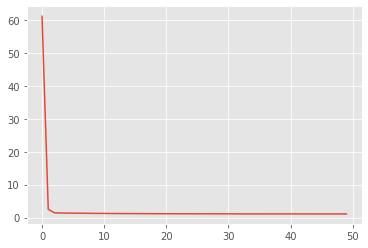

In [24]:
plt.plot(losses)

In [25]:
x_test = torch.linspace(0, 5 , 100).view(100 , 1)

In [26]:
y_test = model(x_test)

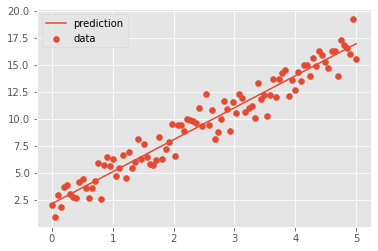

In [31]:
plt.plot(x_test , y_test.detach() , label= "prediction")
plt.scatter(x , y , label='data')
plt.legend()

Pytorchを使用した機械学習の手順。
1．	データの作成・準備<br>
2．	Nn.Moduleを継承してモデルを作成(順伝番などを定義)class LR(nn.Module):<br>
3．	定義したmodelのインスタンス化を行う。Model = LR()<br>
4. 損失関数を定義する。 criterion  = nn.MSELoss()<br>
5. オプティマイザを定義する。optimizer = optim.SGD(model.parameters() , lr = 0.01)
/model.parametersには重み・バイアスの情報が入っている。<br>

6.モデルの学習を行っていく。<br>
/今回は入力をx正解値をyとして計算を行っている。！！<br>


/損失関数を保存しておくリストを作成<br>
losses = []<br>
/エポック数<br>
num_epoch = 500<br>

for epoch in range(num_epoch):
    #今回はミニバッチではなくバッチ学習を行う。
    optimizer.zero_grad()#勾配の初期化を行う。
    y_pred = model(x)#予測値を計算する。

    loss = criterion(y_pred , y)#損失を計算する（予測値　、正解値）
    loss.backward()#誤差逆伝播を行っている。
    optimizer.step()#重みとバイアスの更新を行う。

    #epoch10回ごとに損失の数を表示していく。
    if epoch % 10 == 0:
        print("epoch:{},loss:{}".format(epoch , loss.item()))#item()はtensorからなかの値を取り出している。(参考までに:https://qiita.com/mathlive/items/241bfb42d852bb801b96)
        losses.append(loss.item())

/損失の傾向を見てみる。<br>
plt.plot(losses)
